# Airline Passenger Satisfaction Prediction

## About Dataset
**Context**
This dataset contains an US airline passenger satisfaction survey.

**Problem definition**
Identify which factors are highly correlated to a satisfied (or dissatisfied) passenger and implement a model to predict passenger satisfaction.

**Content**
- `Gender`: Gender of the passengers (Female, Male)
- `Customer Type`: The customer type (Loyal customer, disloyal customer)
- `Age`: The actual age of the passengers
- `Type of Travel`: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- `Class`: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- `Flight distance`: The flight distance of this journey
- `Inflight wifi service`: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- `Departure/Arrival time convenient`: Satisfaction level of Departure/Arrival time convenient
- `Ease of Online booking`: Satisfaction level of online booking
- `Gate location`: Satisfaction level of Gate location
- `Food and drink`: Satisfaction level of Food and drink
- `Online boarding`: Satisfaction level of online boarding
- `Seat comfort`: Satisfaction level of Seat comfort
- `Inflight entertainment`: Satisfaction level of inflight entertainment
- `On-board service`: Satisfaction level of On-board service
- `Leg room service`: Satisfaction level of Leg room service
- `Baggage handling`: Satisfaction level of baggage handling
- `Check-in service`: Satisfaction level of Check-in service
- `Inflight service`: Satisfaction level of inflight service
- `Cleanliness`: Satisfaction level of Cleanliness
- `Departure Delay in Minutes`: Minutes delayed when departure
- `Arrival Delay in Minutes`: Minutes delayed when Arrival
- `Satisfaction`: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [1]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
url = 'https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data'

od.download(url)

Dataset URL: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction


100%|██████████| 2.71M/2.71M [00:00<00:00, 3.12MB/s]


In [3]:
data_dir = 'airline-passenger-satisfaction'

train_df = pd.read_csv(data_dir + '/train.csv')
test_df = pd.read_csv(data_dir + '/test.csv')
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
test_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
train_df = train_df.iloc[:, 2:]
test_df = test_df.iloc[:, 2:]

train_df.columns = [col.upper().replace(' ', '_') for col in train_df.columns]
test_df.columns = [col.upper().replace(' ', '_') for col in test_df.columns]

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   GENDER                             103904 non-null  object 
 1   CUSTOMER_TYPE                      103904 non-null  object 
 2   AGE                                103904 non-null  int64  
 3   TYPE_OF_TRAVEL                     103904 non-null  object 
 4   CLASS                              103904 non-null  object 
 5   FLIGHT_DISTANCE                    103904 non-null  int64  
 6   INFLIGHT_WIFI_SERVICE              103904 non-null  int64  
 7   DEPARTURE/ARRIVAL_TIME_CONVENIENT  103904 non-null  int64  
 8   EASE_OF_ONLINE_BOOKING             103904 non-null  int64  
 9   GATE_LOCATION                      103904 non-null  int64  
 10  FOOD_AND_DRINK                     103904 non-null  int64  
 11  ONLINE_BOARDING                    1039

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GENDER                             25976 non-null  object 
 1   CUSTOMER_TYPE                      25976 non-null  object 
 2   AGE                                25976 non-null  int64  
 3   TYPE_OF_TRAVEL                     25976 non-null  object 
 4   CLASS                              25976 non-null  object 
 5   FLIGHT_DISTANCE                    25976 non-null  int64  
 6   INFLIGHT_WIFI_SERVICE              25976 non-null  int64  
 7   DEPARTURE/ARRIVAL_TIME_CONVENIENT  25976 non-null  int64  
 8   EASE_OF_ONLINE_BOOKING             25976 non-null  int64  
 9   GATE_LOCATION                      25976 non-null  int64  
 10  FOOD_AND_DRINK                     25976 non-null  int64  
 11  ONLINE_BOARDING                    25976 non-null  int

In [7]:
train_df.DEPARTURE_DELAY_IN_MINUTES = train_df.DEPARTURE_DELAY_IN_MINUTES.astype('float')
test_df.DEPARTURE_DELAY_IN_MINUTES = test_df.DEPARTURE_DELAY_IN_MINUTES.astype('float')

In [8]:
train_delay_col = train_df[['DEPARTURE_DELAY_IN_MINUTES', 'ARRIVAL_DELAY_IN_MINUTES']]
test_delay_col = test_df[['DEPARTURE_DELAY_IN_MINUTES', 'ARRIVAL_DELAY_IN_MINUTES']]

print('Training set\n', train_delay_col.describe())
print('\nTest set\n', test_delay_col.describe())

Training set
        DEPARTURE_DELAY_IN_MINUTES  ARRIVAL_DELAY_IN_MINUTES
count               103904.000000             103594.000000
mean                    14.815618                 15.178678
std                     38.230901                 38.698682
min                      0.000000                  0.000000
25%                      0.000000                  0.000000
50%                      0.000000                  0.000000
75%                     12.000000                 13.000000
max                   1592.000000               1584.000000

Test set
        DEPARTURE_DELAY_IN_MINUTES  ARRIVAL_DELAY_IN_MINUTES
count                 25976.00000              25893.000000
mean                     14.30609                 14.740857
std                      37.42316                 37.517539
min                       0.00000                  0.000000
25%                       0.00000                  0.000000
50%                       0.00000                  0.000000
75%            

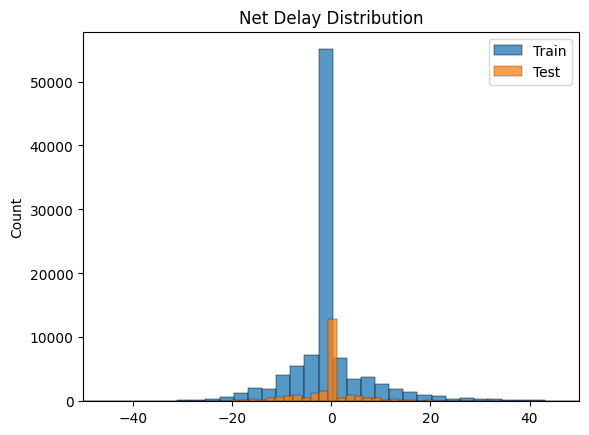

In [9]:
train_net_delay = train_delay_col.ARRIVAL_DELAY_IN_MINUTES - train_delay_col.DEPARTURE_DELAY_IN_MINUTES
test_net_delay = test_delay_col.ARRIVAL_DELAY_IN_MINUTES - test_delay_col.DEPARTURE_DELAY_IN_MINUTES

sns.histplot(train_net_delay, bins=100, label='Train')
sns.histplot(test_net_delay, bins=100, label='Test')
plt.title('Net Delay Distribution')
plt.xlim(-50, 50)
plt.legend()
plt.show()

For the missing values in `ARRIVAL_DELAY_IN_MINUTES`,  it is reasonable to impute them using the corresponding values from `DEPARTURE_DELAY_IN_MINUTES`, since the net delay is typically zero.

In [10]:
train_df['ARRIVAL_DELAY_IN_MINUTES'] = train_df['ARRIVAL_DELAY_IN_MINUTES'].fillna(train_df['DEPARTURE_DELAY_IN_MINUTES'])
test_df['ARRIVAL_DELAY_IN_MINUTES'] = test_df['ARRIVAL_DELAY_IN_MINUTES'].fillna(test_df['DEPARTURE_DELAY_IN_MINUTES'])

In [11]:
print('Missing values for "Arrival Delay" in the training set:', train_df.ARRIVAL_DELAY_IN_MINUTES.isnull().sum())
print('Missing values for "Arrival Delay" in the test set:', test_df.ARRIVAL_DELAY_IN_MINUTES.isnull().sum())

Missing values for "Arrival Delay" in the training set: 0
Missing values for "Arrival Delay" in the test set: 0


In [12]:
train_df.describe(include='all')

,GENDER,CUSTOMER_TYPE,AGE,TYPE_OF_TRAVEL,CLASS,FLIGHT_DISTANCE,INFLIGHT_WIFI_SERVICE,DEPARTURE/ARRIVAL_TIME_CONVENIENT,EASE_OF_ONLINE_BOOKING,GATE_LOCATION,...,INFLIGHT_ENTERTAINMENT,ON-BOARD_SERVICE,LEG_ROOM_SERVICE,BAGGAGE_HANDLING,CHECKIN_SERVICE,INFLIGHT_SERVICE,CLEANLINESS,DEPARTURE_DELAY_IN_MINUTES,ARRIVAL_DELAY_IN_MINUTES,SATISFACTION
count,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904
unique,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,52727,84923,NaN,71655,49665,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,2.756901,2.976883,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.245072,NaN
std,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,1.398929,1.277621,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.808674,NaN
min,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


### Exploratory Data Analysis

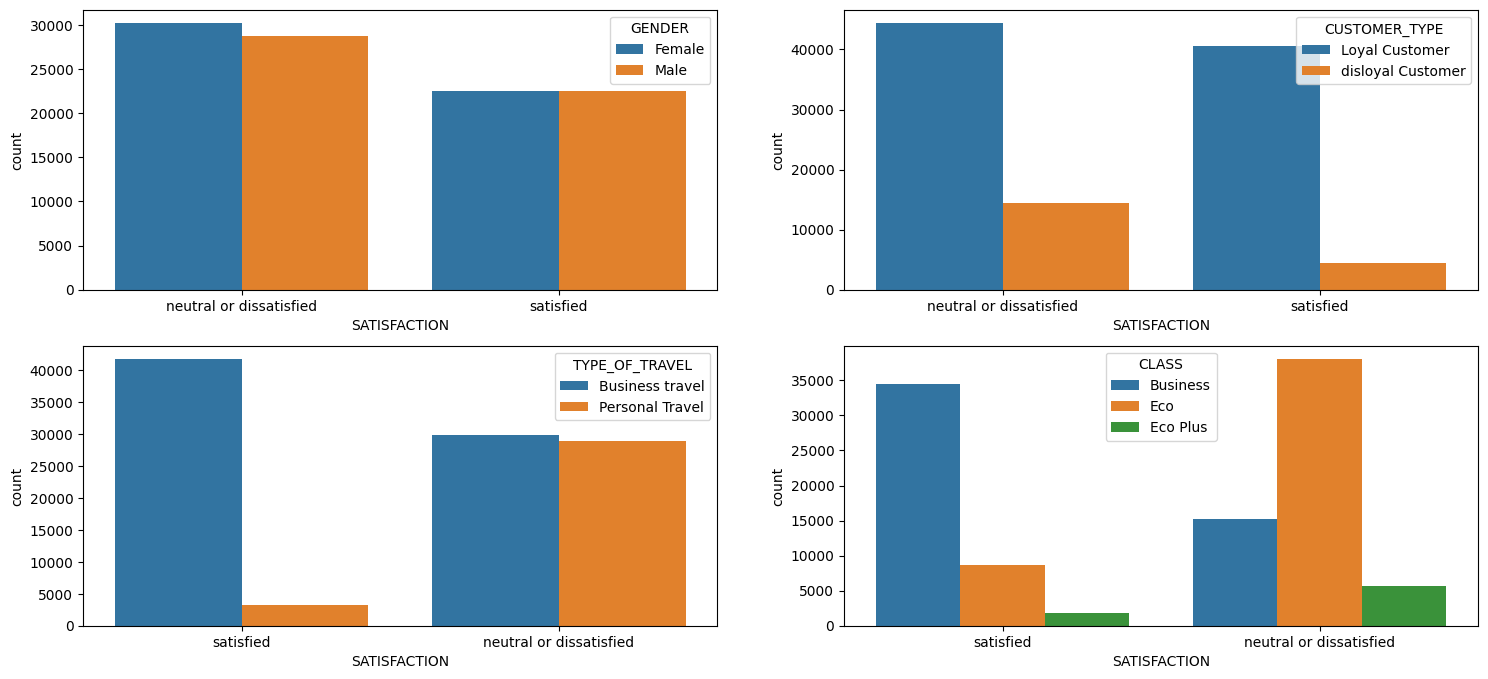

In [13]:
gender_data = train_df.groupby('GENDER')['SATISFACTION'].value_counts().reset_index()
cust_type_data = train_df.groupby('CUSTOMER_TYPE')['SATISFACTION'].value_counts().reset_index()
travel_type_data = train_df.groupby('TYPE_OF_TRAVEL')['SATISFACTION'].value_counts().reset_index()
class_data = train_df.groupby('CLASS')['SATISFACTION'].value_counts().reset_index()

plt.figure(figsize=(18,8))
plt.subplot(2,2,1)
sns.barplot(x='SATISFACTION', y='count', data=gender_data, hue='GENDER')
plt.subplot(2,2,2)
sns.barplot(x='SATISFACTION', y='count', data=cust_type_data, hue='CUSTOMER_TYPE')
plt.subplot(2,2,3)
sns.barplot(x='SATISFACTION', y='count', data=travel_type_data, hue='TYPE_OF_TRAVEL')
plt.subplot(2,2,4)
sns.barplot(x='SATISFACTION', y='count', data=class_data, hue='CLASS')
plt.show()

- Gender seems to have no correlation with customers satisfaction levels.
- Loyal customers are almost equally divided between those who are satified and those who are neutral or dissatisfied.
- Most satiesfied customers traveled for business, in business class.
- Most neutral or dissatisfied customers traveled in economy class.

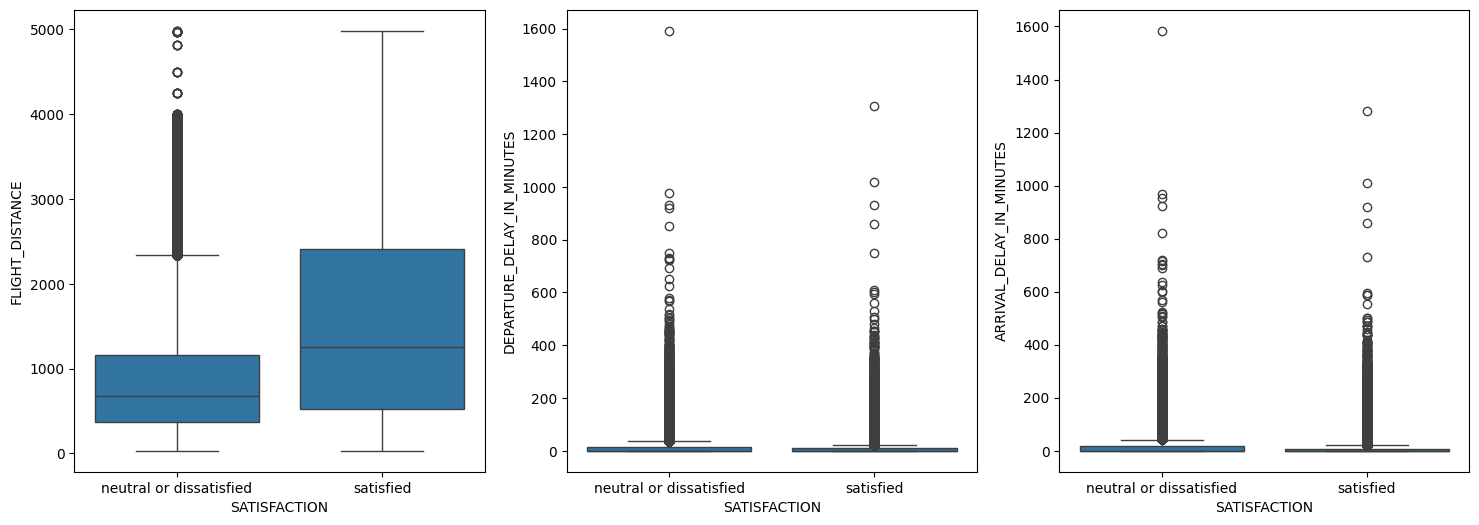

In [14]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.boxplot(x='SATISFACTION', y='FLIGHT_DISTANCE', data=train_df)
plt.subplot(1,3,2)
sns.boxplot(x='SATISFACTION', y='DEPARTURE_DELAY_IN_MINUTES', data=train_df)
plt.subplot(1,3,3)
sns.boxplot(x='SATISFACTION', y='ARRIVAL_DELAY_IN_MINUTES', data=train_df)
plt.show()

In [15]:
train_categorical_data = train_df.select_dtypes('object')
test_categorical_data = test_df.select_dtypes('object')

train_categorical_data.describe()

,GENDER,CUSTOMER_TYPE,TYPE_OF_TRAVEL,CLASS,SATISFACTION
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [16]:
test_categorical_data.describe()

,GENDER,CUSTOMER_TYPE,TYPE_OF_TRAVEL,CLASS,SATISFACTION
count,25976,25976,25976,25976,25976
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,13172,21177,18038,12495,14573


In [17]:
def label_encoder(df, cat_data):

    encoder = {}
    
    for col in cat_data:
        
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoder[col] = le

    return encoder

In [18]:
train_encoder = label_encoder(train_df, train_categorical_data.columns)
test_encoder = label_encoder(test_df, test_categorical_data.columns)

train_df.describe()

,GENDER,CUSTOMER_TYPE,AGE,TYPE_OF_TRAVEL,CLASS,FLIGHT_DISTANCE,INFLIGHT_WIFI_SERVICE,DEPARTURE/ARRIVAL_TIME_CONVENIENT,EASE_OF_ONLINE_BOOKING,GATE_LOCATION,...,INFLIGHT_ENTERTAINMENT,ON-BOARD_SERVICE,LEG_ROOM_SERVICE,BAGGAGE_HANDLING,CHECKIN_SERVICE,INFLIGHT_SERVICE,CLEANLINESS,DEPARTURE_DELAY_IN_MINUTES,ARRIVAL_DELAY_IN_MINUTES,SATISFACTION
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.492541,0.182678,39.379706,0.310373,0.594135,1189.448375,2.729683,3.060296,2.756901,2.976883,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.245072,0.433333
std,0.499947,0.386404,15.114964,0.462649,0.620799,997.147281,1.327829,1.525075,1.398929,1.277621,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.808674,0.495538
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


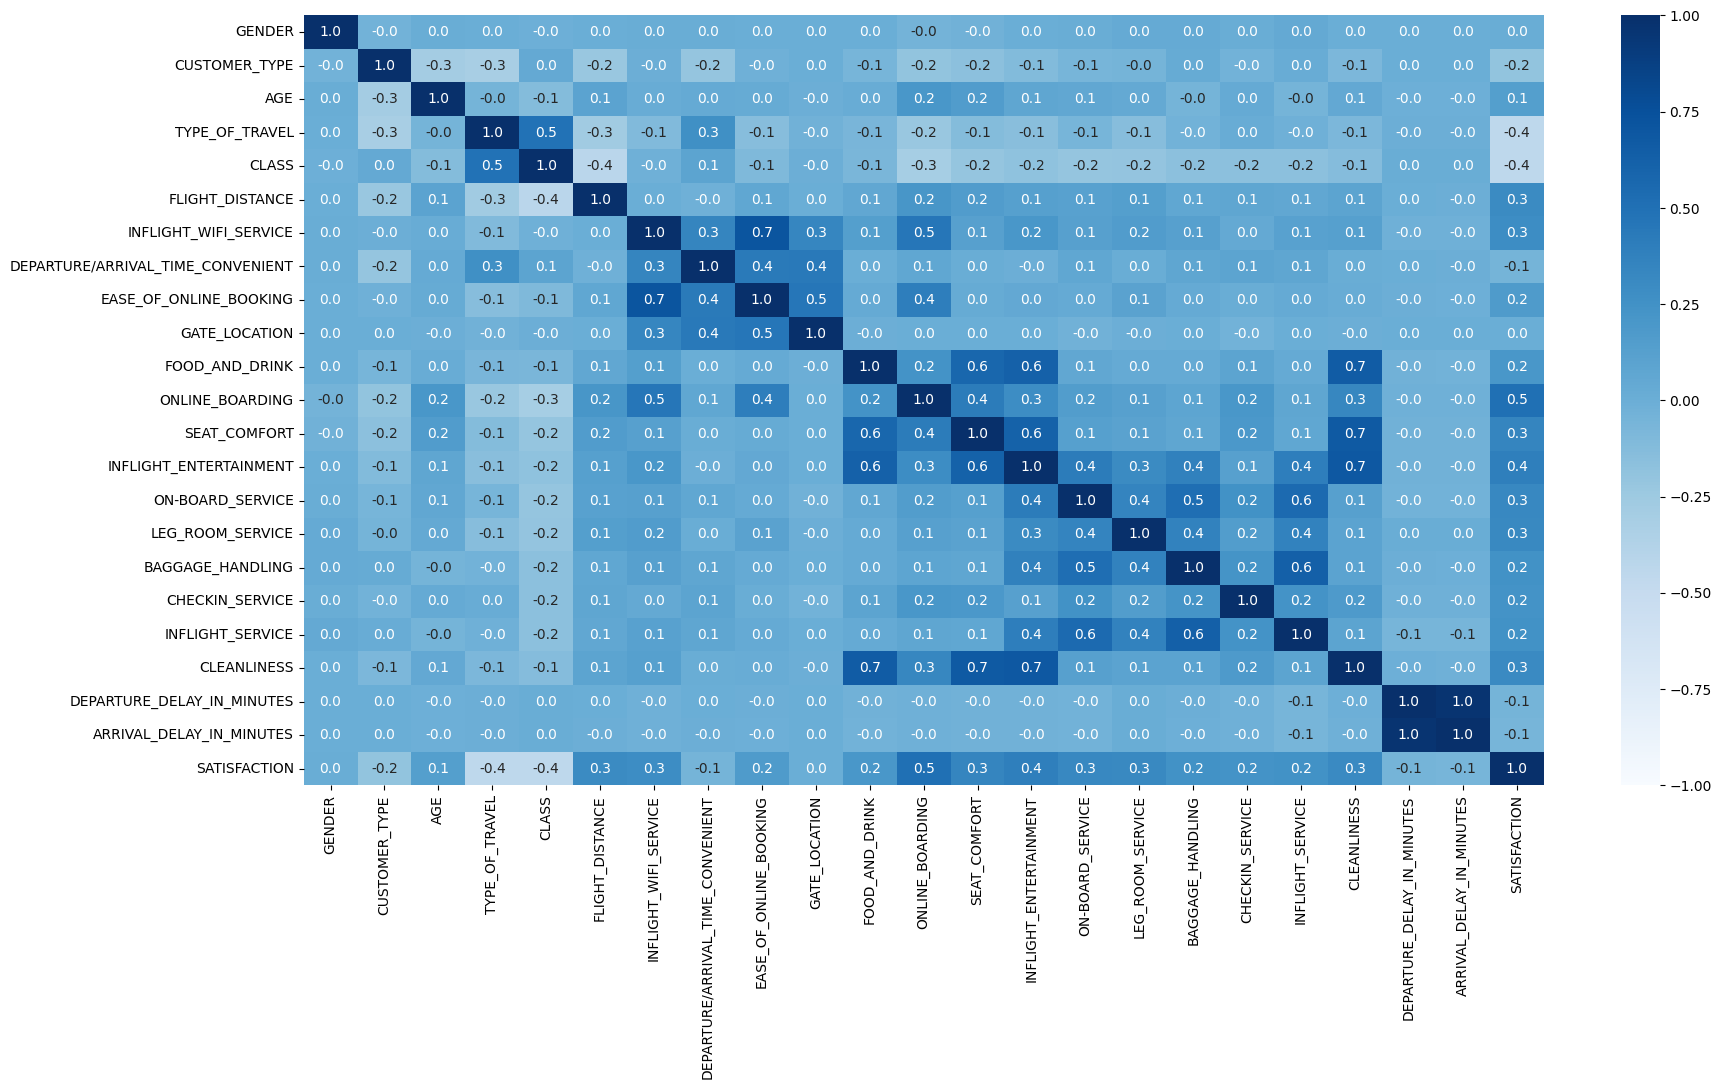

In [19]:
corr_matrix = train_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt='.1f', vmin=-1, vmax=1)
plt.show()

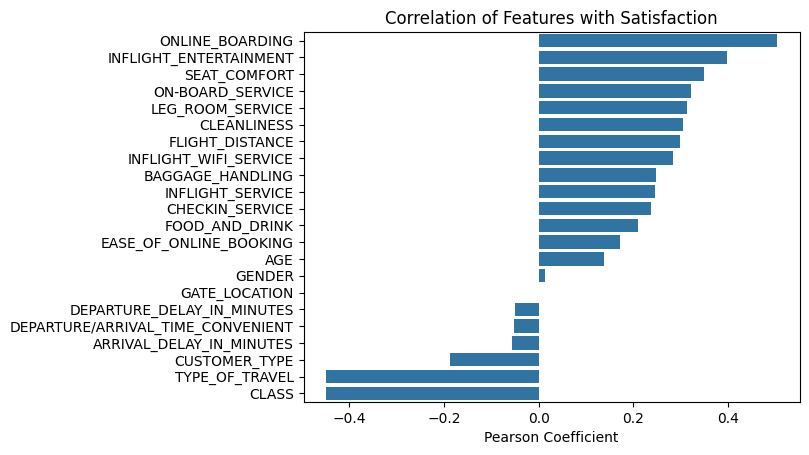

In [20]:
target_corr = corr_matrix['SATISFACTION'].drop('SATISFACTION', axis=0).reset_index().sort_values(by='SATISFACTION', ascending=False)
sns.barplot(data=target_corr, x='SATISFACTION', y='index', orient='h')
plt.xlabel('Pearson Coefficient')
plt.ylabel('')
plt.title('Correlation of Features with Satisfaction')
plt.show()

In [21]:
y_train = train_df.SATISFACTION
X_train = train_df.drop('SATISFACTION', axis=1)

y_test = test_df.SATISFACTION
X_test = test_df.drop('SATISFACTION', axis=1)

### Models Training

1. Logistic Regression

In [22]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

lr = LogisticRegression()

lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
lr_train_accuracy = lr.score(X_train_scaled, y_train)
lr_test_accuracy = lr.score(X_test_scaled, y_test)

print('Logistic Regression accuracy:')
print('on training set: %.3f' % lr_train_accuracy)
print('on test set: %.3f' % lr_test_accuracy)

Logistic Regression accuracy:
on training set: 0.876
on test set: 0.871


2. Cross-validated Logistic Regression

In [24]:
lrcv = LogisticRegressionCV(cv=5, random_state=42)

lrcv.fit(X_train_scaled, y_train)

LogisticRegressionCV(cv=5, random_state=42)

In [25]:
lrcv_train_accuracy = lrcv.score(X_train_scaled, y_train)
lrcv_test_accuracy = lrcv.score(X_test_scaled, y_test)

print('Cross-validated Logistic Regression accuracy:')
print('on training set: %.3f' % lrcv_train_accuracy)
print('on test set: %.3f' % lrcv_test_accuracy)

Cross-validated Logistic Regression accuracy:
on training set: 0.876
on test set: 0.871


Cross-validation confirms that the first model was already well-tuned, since there is no significant benefit from hyperparameter tuning (at least for now).

3. Decision Tree

In [26]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
dt_test_accuracy = dt.score(X_test, y_test)

print('Decision Tree Classifier accuracy on test set: %.3f' % dt_test_accuracy)

Decision Tree Classifier accuracy on test set: 0.947


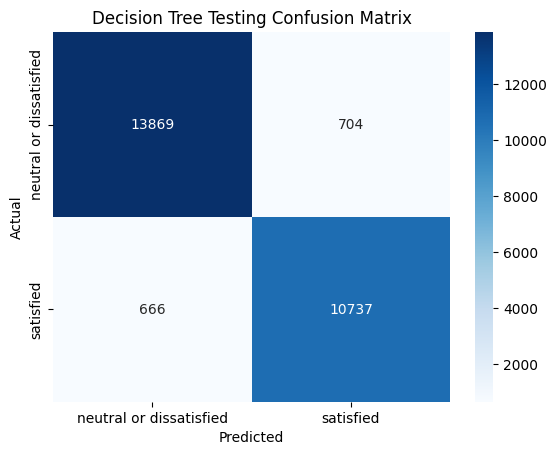

In [28]:
y_pred = dt.predict(X_test)

conf_matr = confusion_matrix(y_test, y_pred)
class_names = test_encoder['SATISFACTION'].classes_


sns.heatmap(conf_matr, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Decision Tree Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- 704 false positives (4.83% of actual neutral or dissatisfied customers were misclassified)
- 666 false negatives (5.84% of actual satisfied customers were misclassified)

In [29]:
print('Decision Tree Classification Report:')
print(classification_report(y_test, y_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14573
           1       0.94      0.94      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



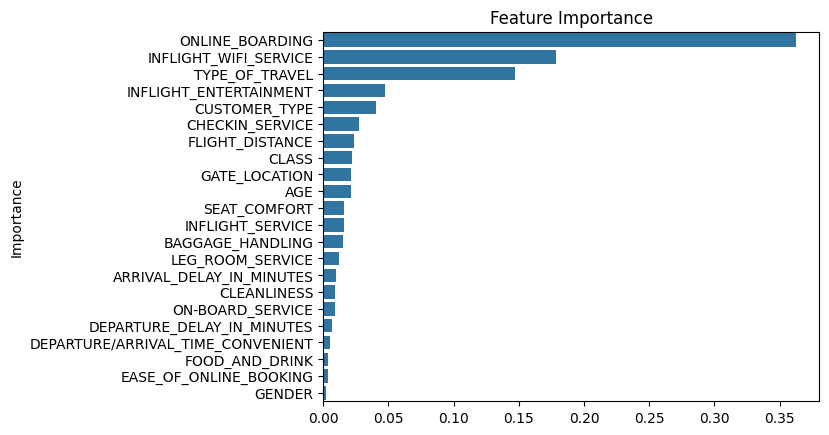

In [30]:
importances = dt.feature_importances_
feature_names = dt.feature_names_in_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

sns.barplot(feat_imp, orient='h')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()

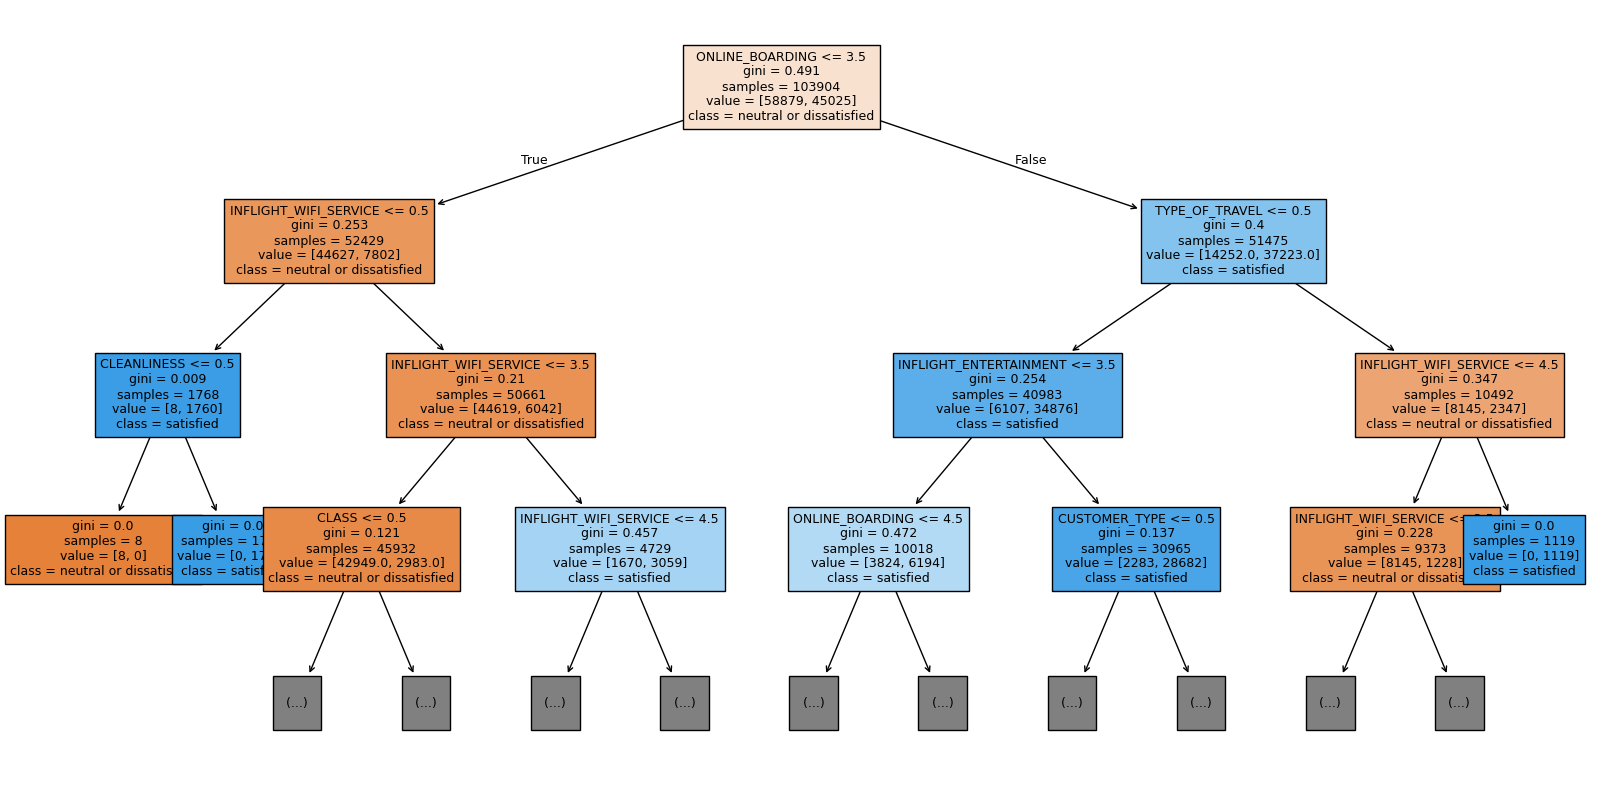

In [31]:
plt.figure(figsize=(20, 10))
plot_tree(dt, 
          filled=True, 
          max_depth=3, 
          feature_names=feature_names, 
          class_names=class_names,
          fontsize=9)
plt.show()

4. K-Nearest Neighbors

In [32]:
knn = KNeighborsClassifier()

params = {
    'n_neighbors': [5, 7, 9, 11],
    'weights': ['uniform', 'distance'] 
}

cv = GridSearchCV(knn, params, cv=5, n_jobs=-1)

cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [33]:
best_knn_pred = cv.predict(X_test_scaled)

best_knn_model = cv.best_estimator_
best_knn_cv_score = cv.best_score_

print('Best model:', best_knn_model)
print('Cross-val score: %.4f' % best_knn_cv_score)
print('Accuracy score on test set: %.4f' % accuracy_score(y_test, best_knn_pred))

Best model: KNeighborsClassifier(n_neighbors=9, weights='distance')
Cross-val score: 0.9286
Accuracy score on test set: 0.9299


5. Random Forest

In [34]:
rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [100, 300],
    'max_depth': [None, 20, 50],
    'max_features': ['sqrt', 'log2']
}

cv = GridSearchCV(rf, params, cv=5, n_jobs=-1)

cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 20, 50],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 300]})

In [35]:
best_rf_pred = cv.predict(X_test)

best_rf_model = cv.best_estimator_
best_rf_cv_score = cv.best_score_

print('Best model:', best_rf_model)
print('Cross-val score: %.4f' % best_rf_cv_score)
print('Accuracy score on test set: %.4f' % accuracy_score(y_test, best_rf_pred))

Best model: RandomForestClassifier(n_estimators=300, random_state=42)
Cross-val score: 0.9625
Accuracy score on test set: 0.9630


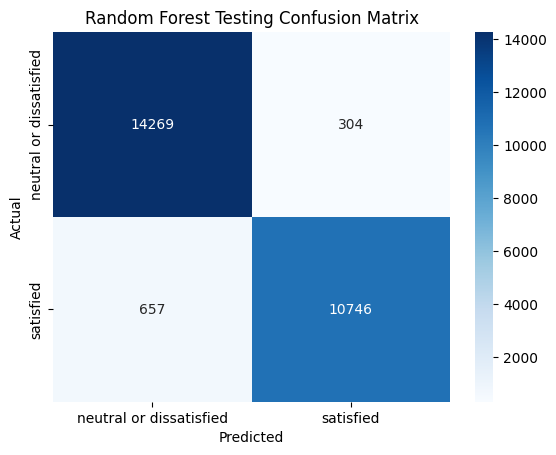

In [36]:
conf_matr = confusion_matrix(y_test, best_rf_pred)

sns.heatmap(conf_matr, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Random Forest Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Random Forest model shows:
- a significant reduction in false positives: from 704 with the Decision Tree to 304, a 57.1% improvement. Only about 2.09% of all neutral or dissatisfied customers were misclassified as satisfied;
- a modest improvement in false negatives too, which dropped by 9 (from 666 to 657), a 1.4% reduction.

In [37]:
print('Random Forest Classification Report:')
print(classification_report(y_test, best_rf_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



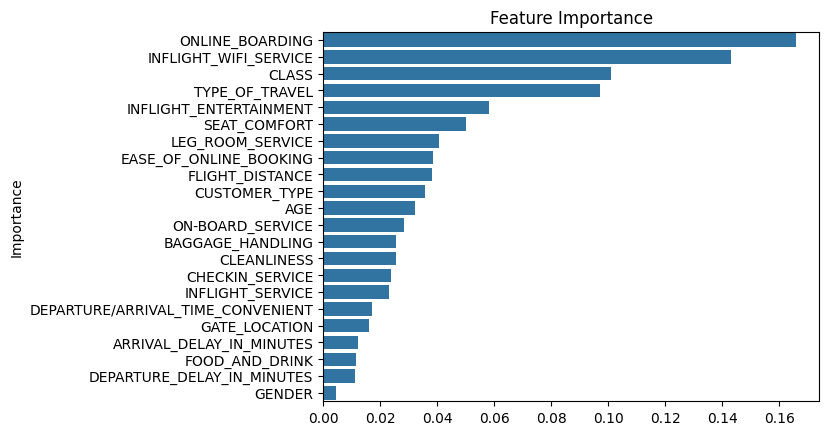

In [38]:
importances = best_rf_model.feature_importances_
feature_names = best_rf_model.feature_names_in_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

sns.barplot(feat_imp, orient='h')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()